# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
# 對AMT_INCOME_TOTAL和AMT_CREDIT進行離散化
# 先去除離群值
mu_AMT_INCOME_TOTAL, sigma_AMT_INCOME_TOTAL = app_train['AMT_INCOME_TOTAL'].mean(), app_train['AMT_INCOME_TOTAL'].std()
mask_AMT_INCOME_TOTAL_1 = app_train['AMT_INCOME_TOTAL'] > (mu_AMT_INCOME_TOTAL - 3 * sigma_AMT_INCOME_TOTAL)
mask_AMT_INCOME_TOTAL_2 = app_train['AMT_INCOME_TOTAL'] < (mu_AMT_INCOME_TOTAL + 3 * sigma_AMT_INCOME_TOTAL)
app_train = app_train[mask_AMT_INCOME_TOTAL_1 & mask_AMT_INCOME_TOTAL_2]

mu_AMT_CREDIT, sigma_AMT_CREDIT = app_train['AMT_CREDIT'].mean(), app_train['AMT_CREDIT'].std()
mask_AMT_CREDIT_1 = app_train['AMT_CREDIT'] > (mu_AMT_CREDIT - 3 * sigma_AMT_CREDIT)
mask_AMT_CREDIT_2 = app_train['AMT_CREDIT'] < (mu_AMT_CREDIT + 3 * sigma_AMT_CREDIT)
app_train = app_train[mask_AMT_CREDIT_1 & mask_AMT_CREDIT_2]

a, b = pd.cut(app_train['AMT_INCOME_TOTAL'], 10), pd.cut(app_train['AMT_CREDIT'], 10)
print(a.value_counts())
print(b.value_counts())

(110835.0, 196020.0]    149109
(24798.15, 110835.0]     69494
(196020.0, 281205.0]     60538
(281205.0, 366390.0]     16522
(366390.0, 451575.0]      5851
(536760.0, 621945.0]       940
(621945.0, 707130.0]       741
(451575.0, 536760.0]       438
(707130.0, 792315.0]       120
(792315.0, 877500.0]       106
Name: AMT_INCOME_TOTAL, dtype: int64
(220500.0, 396000.0]      74738
(396000.0, 571500.0]      59963
(43245.0, 220500.0]       41727
(571500.0, 747000.0]      37774
(747000.0, 922500.0]      36199
(922500.0, 1098000.0]     20270
(1098000.0, 1273500.0]    13988
(1273500.0, 1449000.0]    10492
(1449000.0, 1624500.0]     5529
(1624500.0, 1800000.0]     3179
Name: AMT_CREDIT, dtype: int64


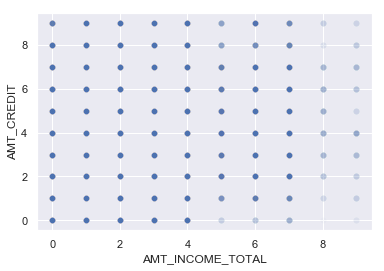

In [6]:
import seaborn as sns
sns.set()

a, b = pd.cut(app_train['AMT_INCOME_TOTAL'], 10, labels=False), pd.cut(app_train['AMT_CREDIT'], 10, labels=False)

# 越淡的代表該處越少重疊的points
sns.scatterplot(x = a, y = b, alpha=0.03)

### 連續型特徵離散化
雖然由之前的分析發現 DAYS_BIRTH 與 TARGET 的相關係數只有 -0.07，  
但在往後的課程裡，為了實際解決問題，我們將需透過一些處理方法，改善相關係數。  
目前我們先以對資料的常識理解，去觀察這兩個欄位的交叉狀況。

In [7]:
print("Correlation between TARGET and DAYS_BIRTH", app_train['DAYS_BIRTH'].corr(app_train['TARGET']))
(app_train['DAYS_BIRTH']/365).describe()

Correlation between TARGET and DAYS_BIRTH -0.07864155888776328


count    303859.000000
mean         43.927867
std          11.974213
min          20.517808
25%          33.972603
50%          43.131507
75%          53.934247
max          69.043836
Name: DAYS_BIRTH, dtype: float64

年齡最小是 20，最大是 69，那我們可以把年齡每 5 歲為一組後再來觀察其與預測目標的關係

In [8]:
# 將年齡相關資料, 另外存成一個 DataFrame 來處理
age_data = app_train[['TARGET', 'DAYS_BIRTH']].copy()
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# 將年齡資料離散化 / 分組
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [9]:
# 依照組別彙整年齡資料 "每一個區間的平均值"
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123431,8532.079425,23.375560
"(25.0, 30.0]",0.111963,10155.109202,27.822217
"(30.0, 35.0]",0.103448,11854.270683,32.477454
"(35.0, 40.0]",0.089961,13707.492212,37.554773
"(40.0, 45.0]",0.078963,15497.376483,42.458566
"(45.0, 50.0]",0.074664,17324.350297,47.463973
"(50.0, 55.0]",0.067418,19196.789472,52.593944
"(55.0, 60.0]",0.055545,20984.653837,57.492202
"(60.0, 65.0]",0.052842,22781.506964,62.415088


[Text(0, 0.5, 'Average Failure to Repay'), Text(0.5, 0, 'Age Group (years)')]

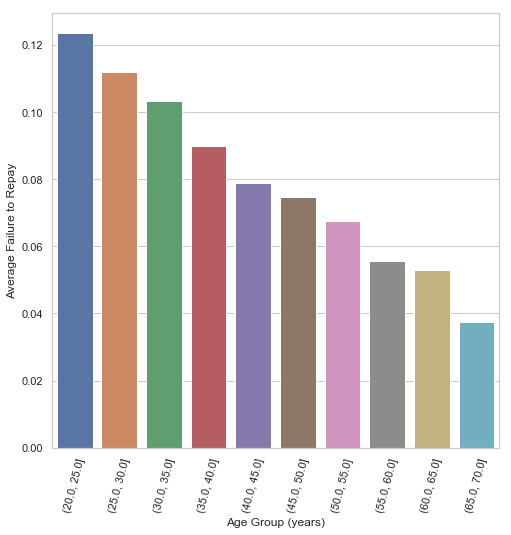

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize = (8, 8))

# 繪製目標值平均與分組組別的長條圖
ax = sns.barplot(np.arange(len(age_groups.index)), age_groups['TARGET'])
ax.set_xticklabels(age_groups.index, rotation = 75)
ax.set(xlabel='Age Group (years)', ylabel='Average Failure to Repay')

可以非常明顯地看出趨勢，越年輕的客戶族群的違約遲繳的可能越大！